# Import Libraries and Data sets

In [1]:
# Importing libaries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# The code below will create a path that will help import the dataframe for analysis.
path_fifa21_new = r'/Users/robertochidiac/Desktop/CareerFoundry Achievement 6/Data/prepared data/fifa21_data_set.csv'

In [4]:
# the code below will import the data
df_fifa21_new = pd.read_csv(os.path.join(path_fifa21_new), index_col = False)

In [5]:
# The code below will show the first five rows of the data frame
df_fifa21_new.head().drop(['Unnamed: 0'], axis = 1)

,short_name,age,dob,height_cm,weight_kg,country,club_name,league_name,overall_performance,potential_performance,value_eur,wage_eur,preferred_foot,weak_foot,release_clause_eur,player_position,team_jersey_number,joined_team,contract_valid_until
0,L. Messi,33,6/24/87,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,560000,Left,4,138400000.0,CAM,10.0,7/1/04,2021.0
1,Cristiano Ronaldo,35,2/5/85,187,83,Portugal,Juventus,Italian Serie A,92,92,46000000,220000,Right,4,75900000.0,LS,7.0,7/10/18,2022.0
2,J. Oblak,27,1/7/93,188,87,Slovenia,Atlético Madrid,Spain Primera Division,91,93,75000000,125000,Right,3,159400000.0,GK,13.0,7/16/14,2023.0
3,R. Lewandowski,31,8/21/88,184,80,Poland,FC Bayern München,German 1. Bundesliga,91,91,80000000,240000,Right,4,132000000.0,ST,9.0,7/1/14,2023.0
4,Neymar Jr,28,2/5/92,175,68,Brazil,Paris Saint-Germain,French Ligue 1,91,91,90000000,270000,Right,5,166500000.0,LW,10.0,8/3/17,2022.0


# Analysis

In [6]:
# The code below will create a subset containing numerical variables that are better suited for K-means algorithm.
df_fifa21_num = df_fifa21_new[['height_cm', 'weight_kg', 'overall_performance', 'potential_performance', 'value_eur', 'wage_eur', 'release_clause_eur']]

In [7]:
df_fifa21_num.head()

,height_cm,weight_kg,overall_performance,potential_performance,value_eur,wage_eur,release_clause_eur
0,170,72,93,93,67500000,560000,138400000.0
1,187,83,92,92,46000000,220000,75900000.0
2,188,87,91,93,75000000,125000,159400000.0
3,184,80,91,91,80000000,240000,132000000.0
4,175,68,91,91,90000000,270000,166500000.0


# Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [33]:
# The code below will use the elbow technique to determine the range of potential clusters in the data.
num_cl = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [34]:
# The code below will create a score that would represent the rate of variation for the cluster range above.
score = [kmeans[i].fit(df_fifa21_num).score(df_fifa21_num) for i in range(len(kmeans))]

In [35]:
score

[-2.3018605038665057e+18,
 -9.549205565129476e+17,
 -4.3871588641457645e+17,
 -2.5713970549348778e+17,
 -1.7321886390965334e+17,
 -1.2237491871741026e+17,
 -9.265516756538754e+16,
 -7.354142813460734e+16,
 -5.825038039995338e+16,
 -4.8621554937157976e+16,
 -4.2007575909132744e+16,
 -3.5757817567857908e+16,
 -3.1973432929434536e+16,
 -2.8307479313570836e+16,
 -2.5009325723171336e+16,
 -2.251707195516462e+16,
 -2.034928503563287e+16,
 -1.826198387536555e+16,
 -1.6973922684628902e+16]

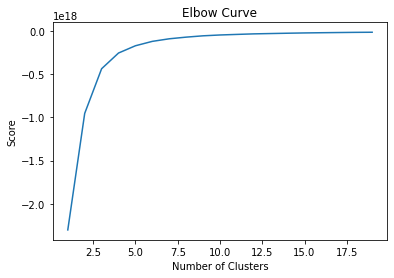

In [36]:
# The code below will plot the elbow curve to help visualize.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

### From the result of the plot above, I will go with 5 clusters for my k-means algorithm. The reason for that choice is related to the jump from the number 2.5 to 5 on the x-axis. After that innitial jump we can then see that the curve flattens for the rest of the numbers.

# Run the k-means algorithm.

In [37]:
# The code below will help create the k-means object.
kmeans = KMeans(n_clusters = 5, n_jobs = -1) 

In [38]:
# The code below will help fit the k-means object to the data.
kmeans.fit(df_fifa21_num)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

# Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [39]:
# The code below will help create the new coloumn 'clusters'.
df_fifa21_num['clusters'] = kmeans.fit_predict(df_fifa21_num)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-39-b4caf7128bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifa21_num['clusters'] = kmeans.fit_predict(df_fifa21_num)


In [44]:
# The code below will show the added 'clusters' column to the daatframe.
df_fifa21_num.head()

,height_cm,weight_kg,overall_performance,potential_performance,value_eur,wage_eur,release_clause_eur,clusters
0,170,72,93,93,67500000,560000,138400000.0,3
1,187,83,92,92,46000000,220000,75900000.0,1
2,188,87,91,93,75000000,125000,159400000.0,3
3,184,80,91,91,80000000,240000,132000000.0,3
4,175,68,91,91,90000000,270000,166500000.0,3


In [46]:
# The code below will help us make more sense of the newly created 'clusters' column by showing the number of observation
df_fifa21_num['clusters'].value_counts()

0    14712
4     2163
2      815
1      204
3       55
Name: clusters, dtype: int64

# Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

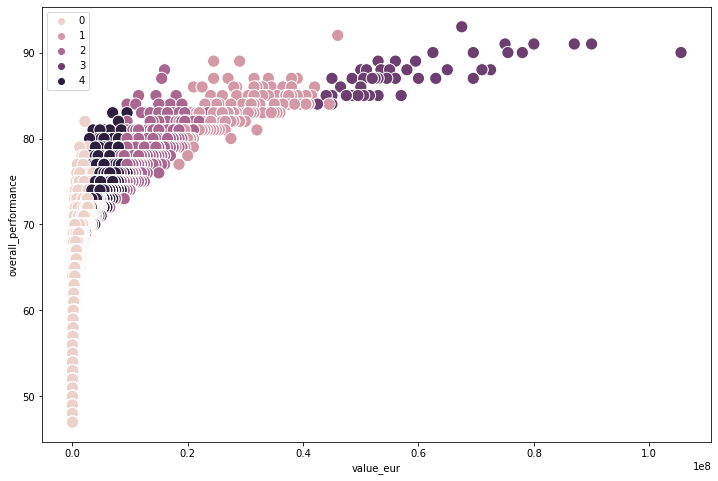

In [56]:
# The code below will plot the clusters for the 'value_eur' and 'overall_performance'.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_fifa21_num['value_eur'], y=df_fifa21_num['overall_performance'], hue=kmeans.labels_, s=150) 
ax.grid(False)
plt.xlabel('value_eur')
plt.ylabel('overall_performance')
plt.show()

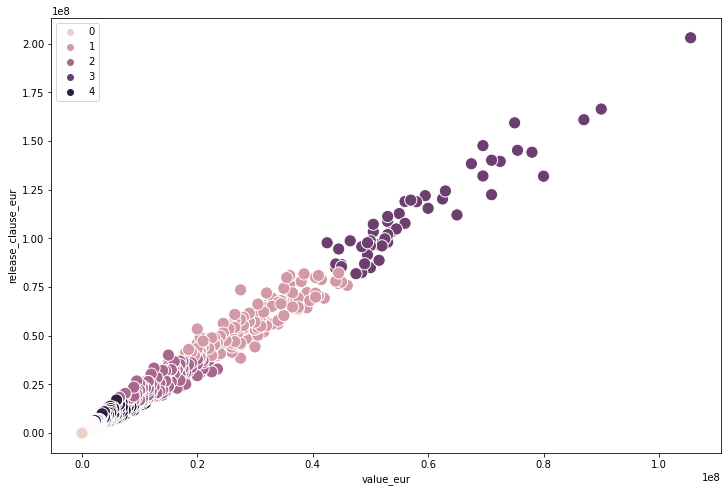

In [54]:
# The code below will plot the clusters for the 'value_eur' and 'overall_performance'.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_fifa21_num['value_eur'], y=df_fifa21_num['release_clause_eur'], hue=kmeans.labels_, s=150) 
ax.grid(False)
plt.xlabel('value_eur')
plt.ylabel('release_clause_eur')
plt.show()

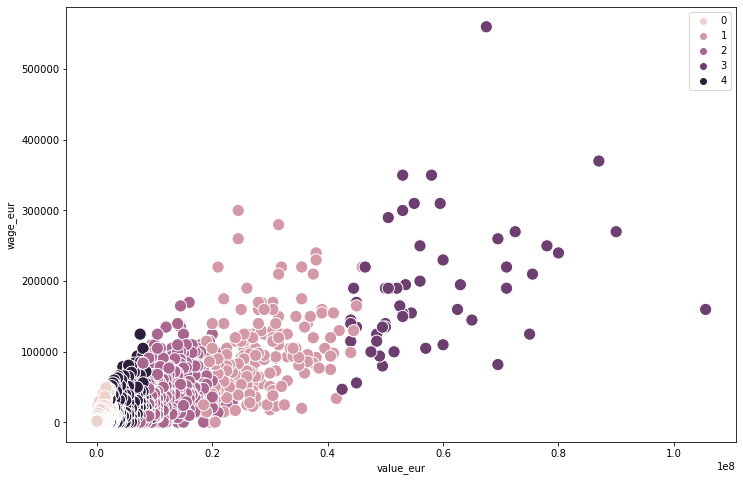

In [55]:
# The code below will plot the clusters for the 'value_eur' and 'overall_performance'.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_fifa21_num['value_eur'], y=df_fifa21_num['wage_eur'], hue=kmeans.labels_, s=150) 
ax.grid(False)
plt.xlabel('value_eur')
plt.ylabel('wage_eur')
plt.show()

# Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

### The clusters make sense. We can clearly see the 5 clusters we have by the different colors they represent.  Each color correspond to a specific cluster that give us more insight about the data we have on hand. 

# Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [59]:
# The codes below will calculate the descriptive statistics for the 5 clusters we have.
df_fifa21_num.loc[df_fifa21_num['clusters'] == 4, 'cluster'] = 'black purple'
df_fifa21_num.loc[df_fifa21_num['clusters'] == 3, 'cluster'] = 'dark purple'
df_fifa21_num.loc[df_fifa21_num['clusters'] == 2, 'cluster'] = 'purple'
df_fifa21_num.loc[df_fifa21_num['clusters'] == 1, 'cluster'] = 'pink'
df_fifa21_num.loc[df_fifa21_num['clusters'] == 0, 'cluster'] = 'light pink'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [58]:
df_fifa21_num.groupby('cluster').agg({'overall_performance':['mean', 'median'], 
                         'value_eur':['mean', 'median'], 
                         'wage_eur':['mean', 'median'],
                          'release_clause_eur':['mean', 'median']})

overall_performance            value_eur            \
                            mean median          mean    median   
cluster                                                           
black purple           73.970874     74  5.307675e+06   4900000   
dark purple            87.363636     87  5.841818e+07  53000000   
light pink             63.386963     64  6.962332e+05    500000   
pink                   82.975490     83  2.781127e+07  26500000   
purple                 78.026994     78  1.236564e+07  11500000   

                   wage_eur         release_clause_eur               
                       mean  median               mean       median  
cluster                                                              
black purple   20514.563107   17000       1.000781e+07    9400000.0  
dark purple   192436.363636  190000       1.128491e+08  107300000.0  
light pink      3628.707858    2000       1.260239e+06     875000.0  
pink           90151.960784   82000       5.418824e+07   50800000.0  
purple         39483.435583   33000       2.413080e+07   22800000.0

# Propose what these results could be useful for in future steps of an analytics pipeline.

### The results show us that there are still a lot of questions that need answers, and further analysis would be needed to further understand the data. We can see that there are clusters which is an indication that some of the data could be further classified and do additional research. We can see that dark purple has some of the best mean and median, but it also the one with less observation.